Object-Centric Event Log (number of events: 23, number of objects: 14, number of activities: 7, number of object types: 7, events-objects relationships: 72)
Activities occurrences: {'Pick asset from warehouse': 5, 'Enter room': 3, 'Chat': 3, 'Check asset quality': 3, 'Check-Out asset to user': 3, 'Handover asset to user': 3, 'Leave room': 3}
Object types occurrences (number of objects): {'item_asset': 5, 'admin_user': 4, 'door': 1, 'it_working_desk': 1, 'laptop_shelf': 1, 'mouse_cupboard': 1, 'monitor_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


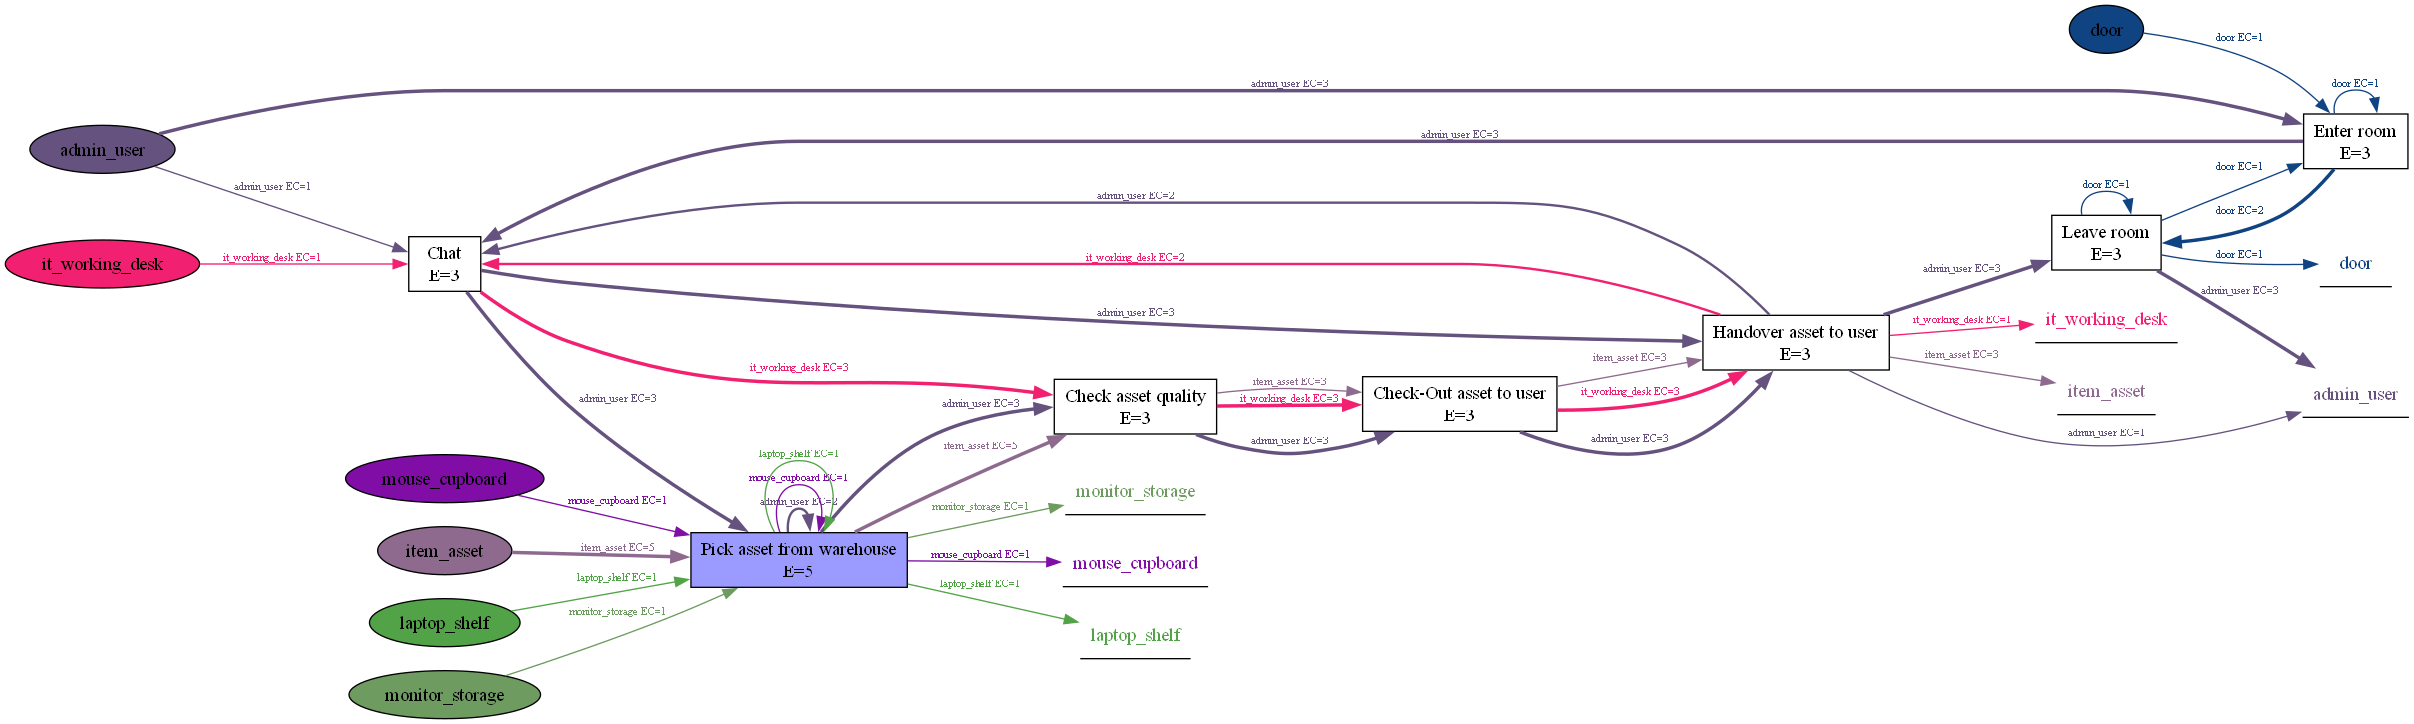

parsing log, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

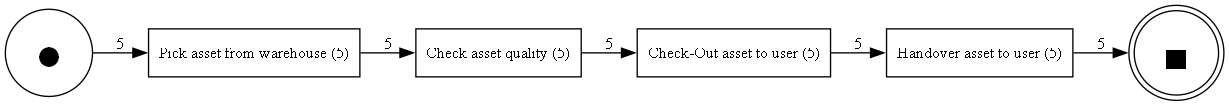

exporting log, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

In [1]:
import pm4py

## ID001: Asset disbursement to clients
## ID002: Asset disbursement to clients
## ID003: Asset disbursement to clients

video01_log_ocel = pm4py.read_ocel_json('../scene01/scene01_video_ocel.json')
print(video01_log_ocel)

# Modern ocel-dfg
ocel01_adtc = pm4py.ocel.discover_ocdfg(video01_log_ocel)
pm4py.vis.view_ocdfg(ocel01_adtc)  

# no filter, write for docu purpose
ocel01_path_adtc = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene01_video_ocel_adtc'
pm4py.write_ocel_json(video01_log_ocel,ocel01_path_adtc)


### XES
video01_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene01_video_xes.xes')

dfg, start_activities, end_activities = pm4py.discover_dfg(video01_log_xes, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes01_path_adtc = '../dataProcessing/filteredSceneVideoXES/filtered_scene01_video_adtc'
pm4py.write_xes(video01_log_xes,xes01_path_adtc)

Object-Centric Event Log (number of events: 12, number of objects: 6, number of activities: 7, number of object types: 5, events-objects relationships: 36)
Activities occurrences: {'Unpack asset': 2, 'Test asset quality and functionality': 2, 'Install and configure asset': 2, 'Move asset to storage': 2, 'Create system entry for asset': 2, 'Pick asset from warehouse': 1, 'Pick asset from self service desk': 1}
Object types occurrences (number of objects): {'item_asset': 2, 'admin_user': 1, 'mouse_cupboard': 1, 'it_working_desk': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


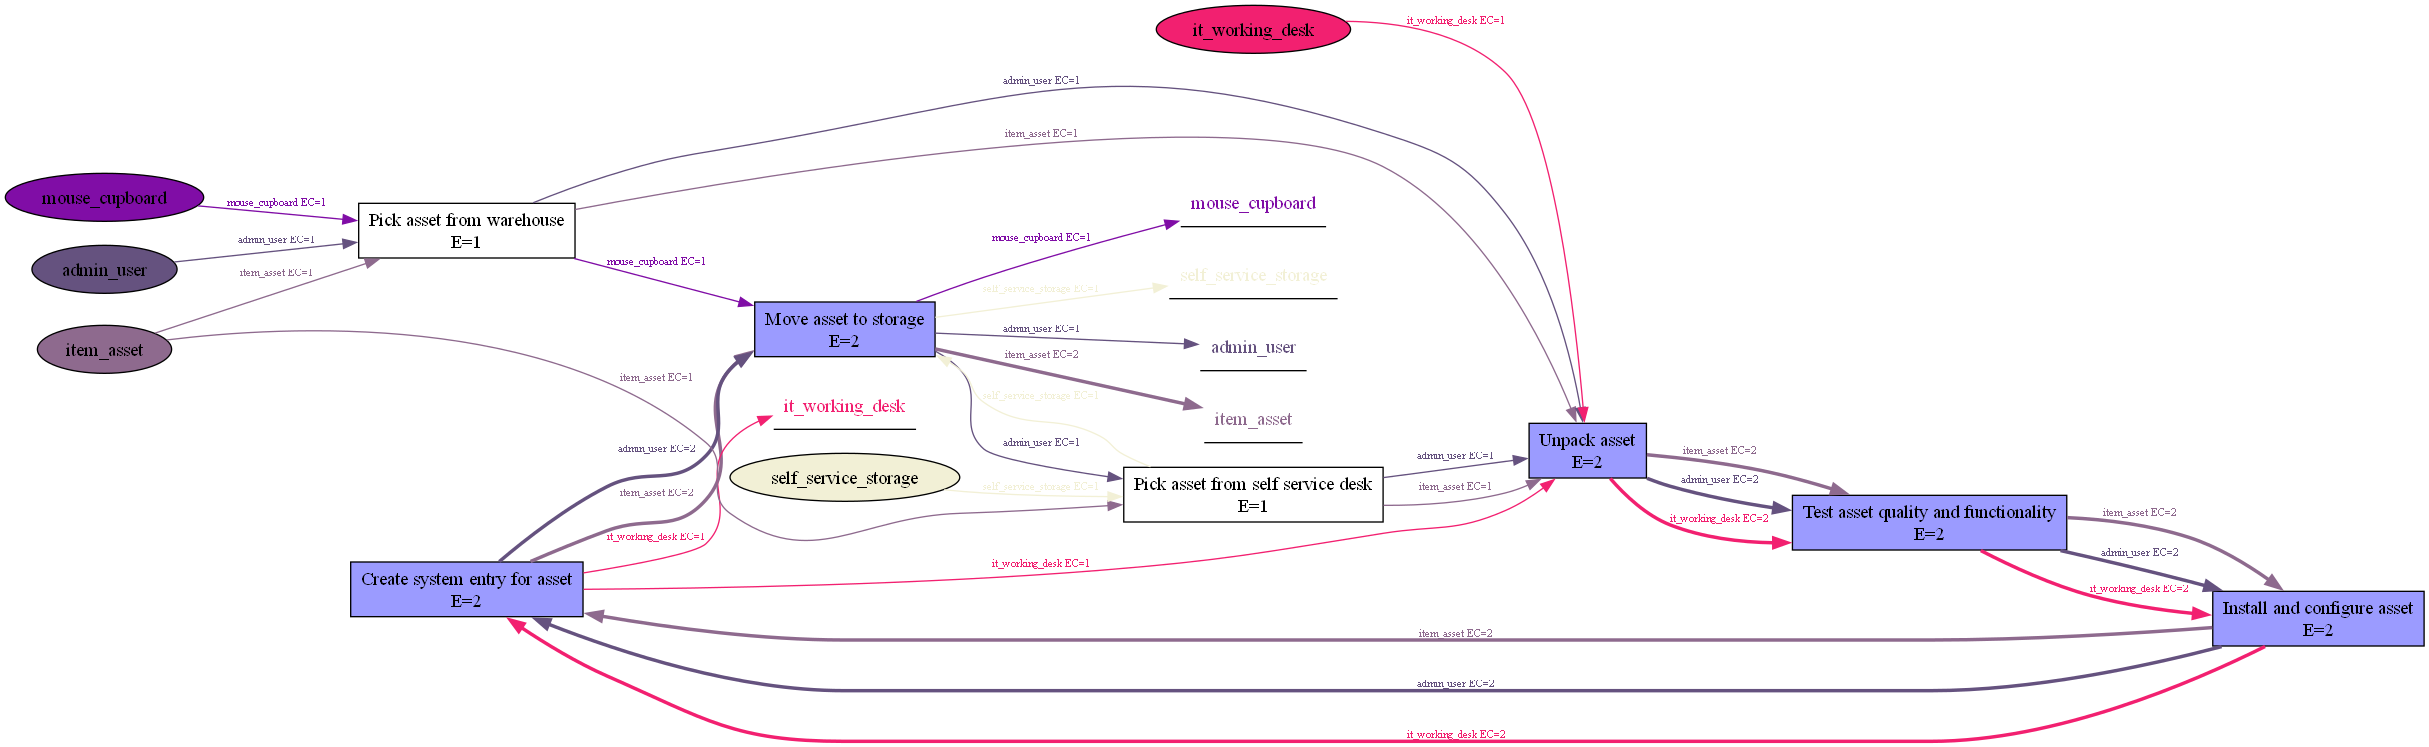

parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

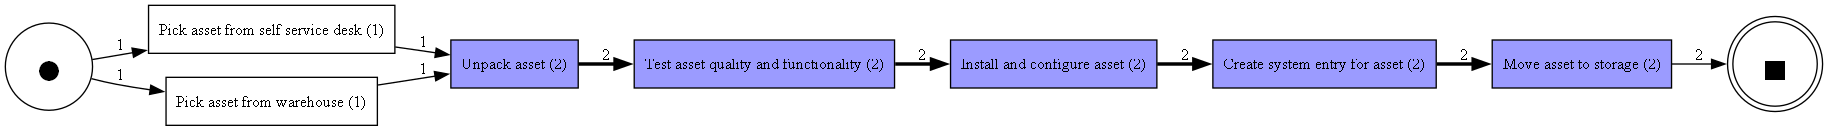

exporting log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
## ID004: New asset inventory
## ID005: New asset inventory

video02_log_ocel = pm4py.read_ocel_json('../scene02/scene02_video_ocel.json')
print(video02_log_ocel)

ocel02_nai = pm4py.ocel.discover_ocdfg(video02_log_ocel)
pm4py.vis.view_ocdfg(ocel02_nai)  

# no filter, write for docu purpose
ocel02_path_nai = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene02_video_ocel_nai'
pm4py.write_ocel_json(video02_log_ocel,ocel02_path_nai)


### XES
video02_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene02_video_xes.xes')

dfg, start_activities, end_activities = pm4py.discover_dfg(video02_log_xes, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes02_path_nai = '../dataProcessing/filteredSceneVideoXES/filtered_scene02_video_nai'
pm4py.write_xes(video02_log_xes,xes02_path_nai)

Object-Centric Event Log (number of events: 24, number of objects: 14, number of activities: 16, number of object types: 7, events-objects relationships: 67)
Activities occurrences: {'Enter room': 3, 'Install and configure asset': 3, 'Leave room': 3, 'Pick asset from warehouse': 2, 'Pick asset from self service desk': 2, 'Test asset quality and functionality': 1, 'Create system entry for asset': 1, 'Unpack asset': 1, 'Check asset quality': 1, 'Describe quality issue': 1, 'Check-In asset for repair': 1, 'Move asset to repair desk': 1, 'Handover asset to user': 1, 'Check-Out asset to user': 1, 'Label asset': 1, 'Move asset to storage': 1}
Object types occurrences (number of objects): {'item_asset': 5, 'admin_user': 4, 'laptop_shelf': 1, 'repair_desk': 1, 'it_working_desk': 1, 'door': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


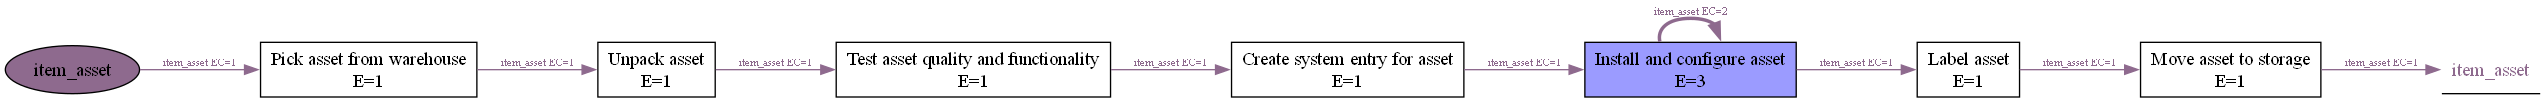

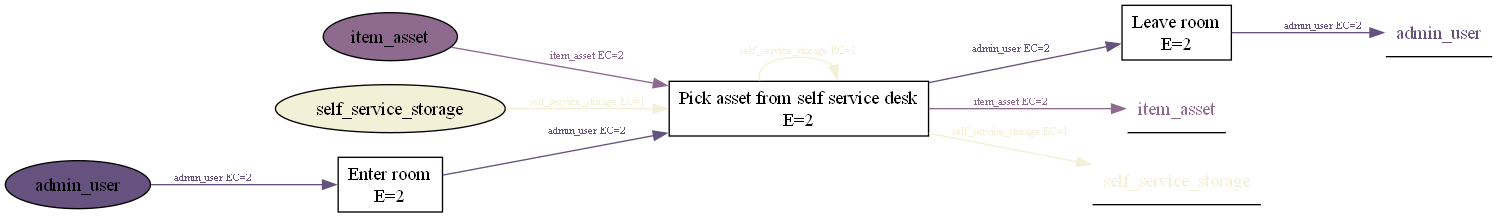

parsing log, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


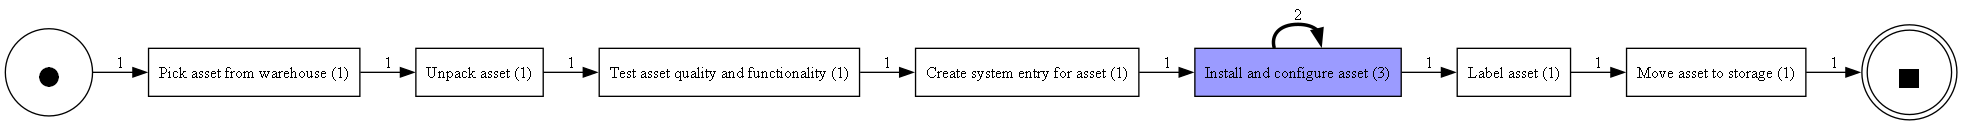

exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


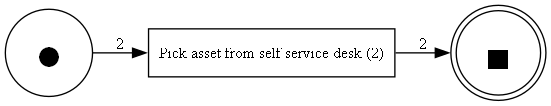

exporting log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
## ID006: New asset inventory
## ID008: Self-service asset check-out
## ID009: Self-service asset check-out

video03_log_ocel = pm4py.read_ocel_json('../scene03/scene03_video_ocel.json')
print(video03_log_ocel)

### OCEL

# Filter New asset inventory
filtered_ocel03_nai = pm4py.filtering.filter_ocel_objects(video03_log_ocel, object_identifiers=['L1','L3','C1','C5', 'K1','C6','H4'],positive=False,level=2)
ocel03_nai = pm4py.ocel.discover_ocdfg(filtered_ocel03_nai)
pm4py.vis.view_ocdfg(ocel03_nai)  

ocel03_path_nai = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene03_video_ocel_nai'
pm4py.write_ocel_json(filtered_ocel03_nai,ocel03_path_nai)

# Filter Self-serice asset check-out
filtered_ocel03_ssaco = pm4py.filtering.filter_ocel_objects(video03_log_ocel, object_identifiers=['L1','L3','C1','A1','L5'],positive=False,level=2)
ocel03_ssaco = pm4py.ocel.discover_ocdfg(filtered_ocel03_ssaco)
pm4py.vis.view_ocdfg(ocel03_ssaco)  

ocel03_path_ssaco = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene03_video_ocel_ssaco'
pm4py.write_ocel_json(filtered_ocel03_ssaco,ocel03_path_ssaco)


### XES

video03_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene03_video_xes.xes')

# Filter New asset inventory
filtered_xes03_nai = pm4py.filtering.filter_trace_attribute_values(log=video03_log_xes, attribute_key='case:concept:name', values=['L1','L3','K1','H4'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes03_nai, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes03_path_nai = '../dataProcessing/filteredSceneVideoXES/filtered_scene03_video_nai'
pm4py.write_xes(filtered_xes03_nai,xes03_path_nai)

# Filter Self-serice asset check-out
filtered_xes03_ssaco = pm4py.filtering.filter_trace_attribute_values(log=video03_log_xes, attribute_key='case:concept:name', values=['L1','L3','L5'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes03_ssaco, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes03_path_ssaco = '../dataProcessing/filteredSceneVideoXES/filtered_scene03_video_ssaco'
pm4py.write_xes(filtered_xes03_ssaco,xes03_path_ssaco)



Object-Centric Event Log (number of events: 17, number of objects: 10, number of activities: 12, number of object types: 7, events-objects relationships: 50)
Activities occurrences: {'Move asset to storage': 3, 'Unpack asset': 2, 'Install and configure asset': 2, 'Test asset quality and functionality': 2, 'Pick asset from warehouse': 1, 'Pick asset from self service desk': 1, 'Label asset': 1, 'Enter room': 1, 'Handover asset to admin': 1, 'Check asset quality': 1, 'Check-In asset to storage': 1, 'Leave room': 1}
Object types occurrences (number of objects): {'item_asset': 3, 'admin_user': 2, 'self_service_storage': 1, 'repair_desk': 1, 'it_working_desk': 1, 'door': 1, 'monitor_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


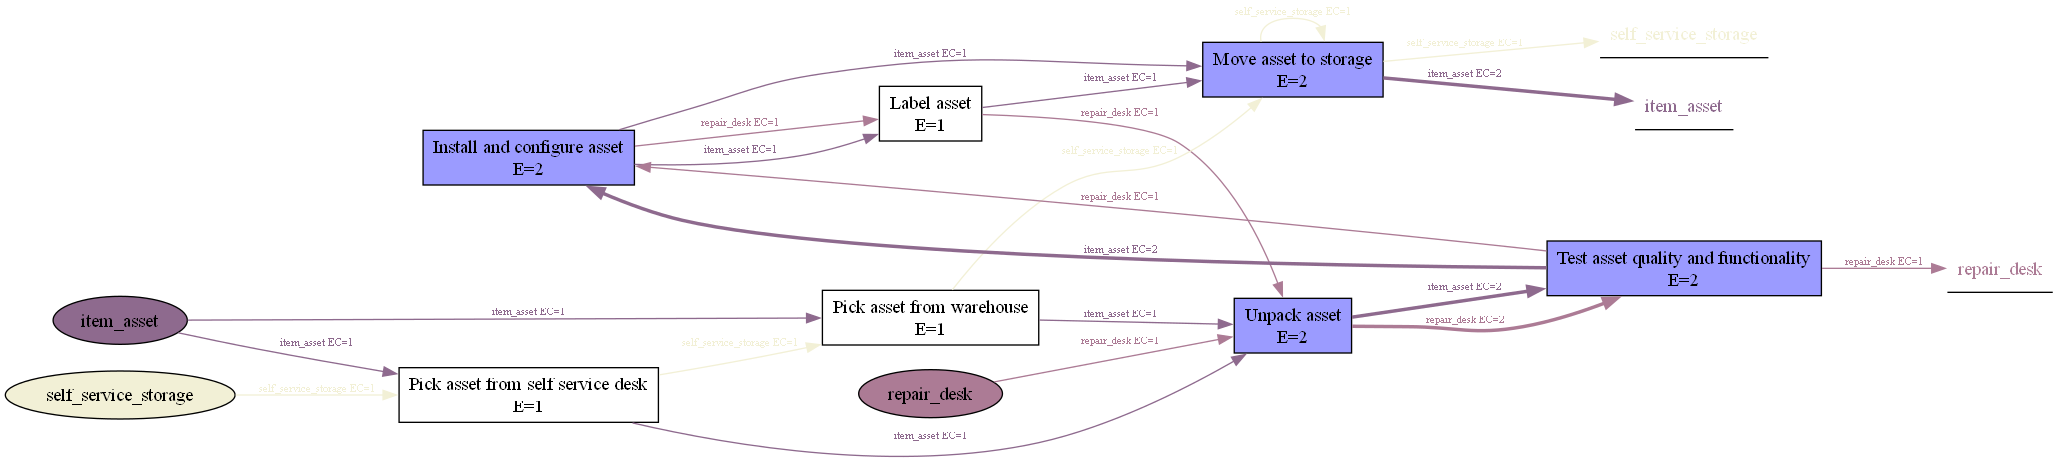

parsing log, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


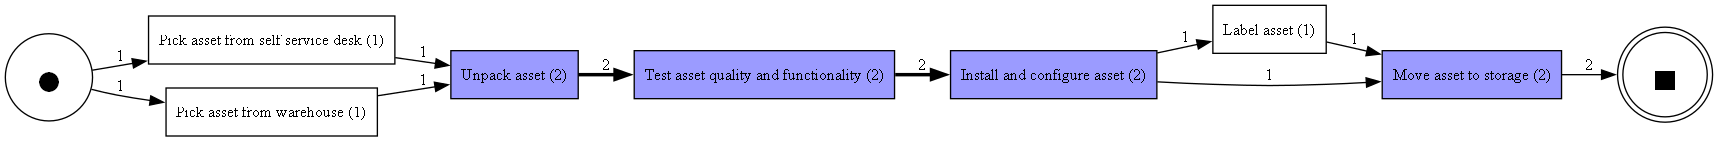

exporting log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
## ID010: New asset inventory
## ID011: New asset inventory

video04_log_ocel = pm4py.read_ocel_json('../scene04/scene04_video_ocel.json')
print(video04_log_ocel)

filtered_ocel04_nai = pm4py.filtering.filter_ocel_objects(video04_log_ocel, object_identifiers=['M1', 'C2'],positive=False,level=2)
ocel04 = pm4py.ocel.discover_ocdfg(filtered_ocel04_nai)
pm4py.vis.view_ocdfg(ocel04)  

ocel_path = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene04_video_ocel_nai'
pm4py.write_ocel_json(filtered_ocel04_nai,ocel_path)

### XES
video04_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene04_video_xes.xes')
filtered_xes04_nai = pm4py.filtering.filter_trace_attribute_values(log=video04_log_xes, attribute_key='case:concept:name', values=['M1'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes04_nai, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes04_path_nai = '../dataProcessing/filteredSceneVideoXES/filtered_scene04_video_nai'
pm4py.write_xes(filtered_xes04_nai,xes04_path_nai)

Object-Centric Event Log (number of events: 10, number of objects: 9, number of activities: 10, number of object types: 7, events-objects relationships: 25)
Activities occurrences: {'Open window': 1, 'other, see notes': 1, 'Carry out repair': 1, 'Enter room': 1, 'Chat': 1, 'Pick asset from self service desk': 1, 'Leave room': 1, 'Check asset quality': 1, 'Update asset status in the system': 1, 'Move asset to storage': 1}
Object types occurrences (number of objects): {'admin_user': 2, 'item_asset': 2, 'window': 1, 'repair_desk': 1, 'laptop_shelf': 1, 'door': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


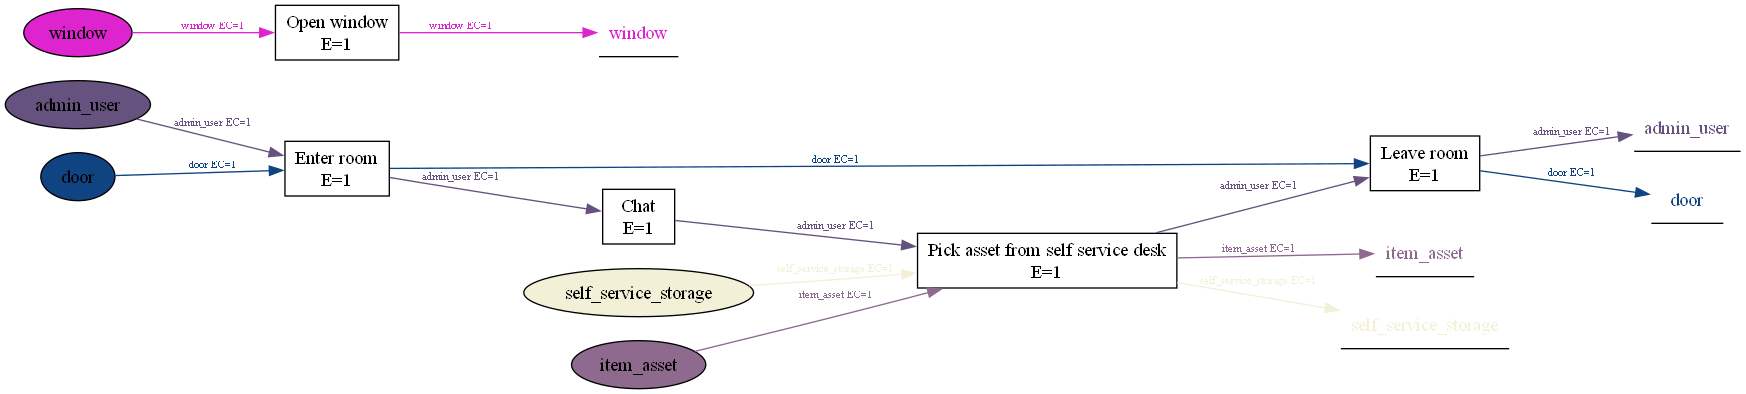

parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


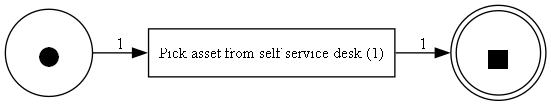

exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
## ID014: Self-service asset check-out

video5_log_ocel = pm4py.read_ocel_json('../scene05/scene05_video_ocel.json')
print(video5_log_ocel)

filtered_ocel05_ssaco = pm4py.filtering.filter_ocel_objects(video5_log_ocel, object_identifiers=['L1'],positive=False,level=2)
ocel05 = pm4py.ocel.discover_ocdfg(filtered_ocel05_ssaco)
pm4py.vis.view_ocdfg(ocel05)  

ocel_path = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene05_video_ocel_ssaco'
pm4py.write_ocel_json(filtered_ocel05_ssaco,ocel_path)


### XES
video05_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene05_video_xes.xes')
filtered_xes05 = pm4py.filtering.filter_trace_attribute_values(log=video05_log_xes, attribute_key='case:concept:name', values=['L1'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes05, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes05_path_ssaco = '../dataProcessing/filteredSceneVideoXES/filtered_scene05_video_ssaco'
pm4py.write_xes(filtered_xes05,xes05_path_ssaco)

Object-Centric Event Log (number of events: 21, number of objects: 15, number of activities: 13, number of object types: 8, events-objects relationships: 61)
Activities occurrences: {'Enter room': 3, 'Move asset to storage': 3, 'Leave room': 3, 'Install and configure asset': 2, 'Pick asset from self service desk': 2, 'Unpack asset': 1, 'Test asset quality and functionality': 1, 'Pick asset from warehouse': 1, 'Label asset': 1, 'Create system entry for asset': 1, 'Handover asset to admin': 1, 'Check asset quality': 1, 'Check-In asset to storage': 1}
Object types occurrences (number of objects): {'item_asset': 5, 'admin_user': 4, 'laptop_shelf': 1, 'repair_desk': 1, 'it_working_desk': 1, 'door': 1, 'self_service_storage': 1, 'mouse_cupboard': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


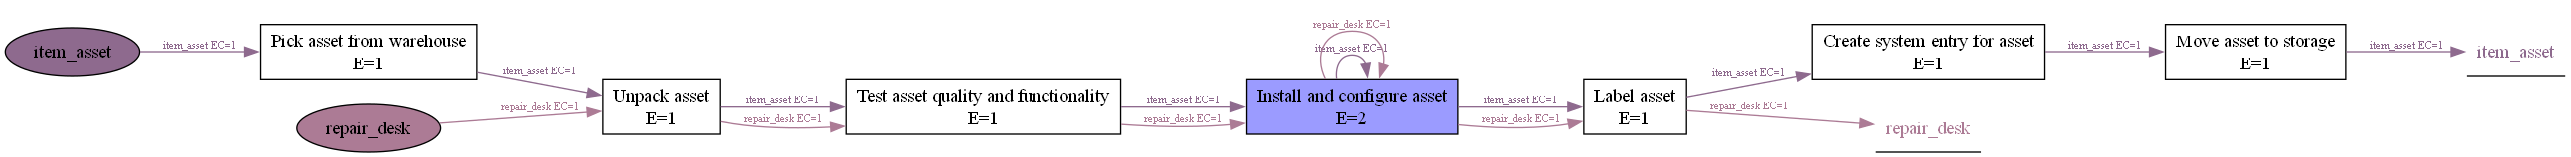

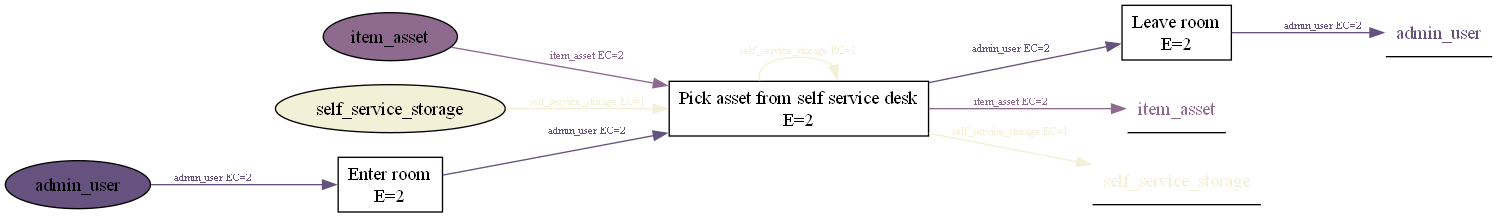

parsing log, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


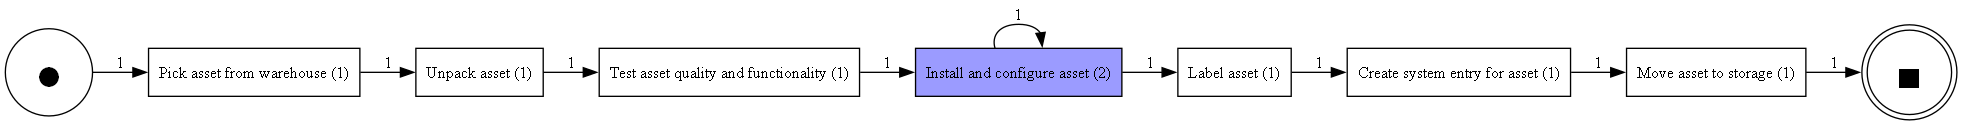

exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


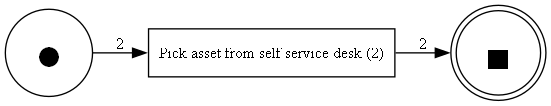

exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
## ID015: New asset inventory
## ID016: Self-service asset check-out
## ID018: Self-service asset check-out

video06_log_ocel = pm4py.read_ocel_json('../scene06/scene06_video_ocel.json')
print(video06_log_ocel)

# New asset inventory
filtered_ocel06_nai = pm4py.filtering.filter_ocel_objects(video06_log_ocel, object_identifiers=['C1', 'L3', 'P2','C10', 'H11','C9','K4'],positive=False,level=2)
ocel06_nai = pm4py.ocel.discover_ocdfg(filtered_ocel06_nai)
pm4py.vis.view_ocdfg(ocel06_nai)  

ocel06_path_nai = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene06_video_ocel_nai'
pm4py.write_ocel_json(filtered_ocel06_nai,ocel06_path_nai)

# Self-service asset check-out
filtered_ocel06_ssaco = pm4py.filtering.filter_ocel_objects(video06_log_ocel, object_identifiers=['C1', 'L3', 'P2', 'A1', 'L6'],positive=False,level=2)
ocel06_ssaco = pm4py.ocel.discover_ocdfg(filtered_ocel06_ssaco)
pm4py.vis.view_ocdfg(ocel06_ssaco)  

ocel06_path_ssaco = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene06_video_ocel_ssaco'
pm4py.write_ocel_json(filtered_ocel06_ssaco,ocel06_path_ssaco)


### XES
video06_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene06_video_xes.xes')

# New asset inventory
filtered_xes06_nai = pm4py.filtering.filter_trace_attribute_values(log=video06_log_xes, attribute_key='case:concept:name', values=['L3', 'P2', 'H11','K4'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes06_nai, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes06_path_nai = '../dataProcessing/filteredSceneVideoXES/filtered_scene06_video_nai'
pm4py.write_xes(filtered_xes06_nai,xes06_path_nai)

# Self-service asset check-out
filtered_xes06_ssaco = pm4py.filtering.filter_trace_attribute_values(log=video06_log_xes, attribute_key='case:concept:name', values=['L3', 'P2', 'L6'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes06_ssaco, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes06_path_ssaco = '../dataProcessing/filteredSceneVideoXES/filtered_scene06_video_ssaco'
pm4py.write_xes(filtered_xes06_nai,xes06_path_ssaco)

Object-Centric Event Log (number of events: 16, number of objects: 10, number of activities: 11, number of object types: 7, events-objects relationships: 47)
Activities occurrences: {'Pick asset from self service desk': 2, 'Unpack asset': 2, 'Test asset quality and functionality': 2, 'Create system entry for asset': 2, 'Move asset to storage': 2, 'Install and configure asset': 1, 'Enter room': 1, 'Pick asset from warehouse': 1, 'Check asset quality': 1, 'Handover asset to user': 1, 'Leave room': 1}
Object types occurrences (number of objects): {'item_asset': 3, 'admin_user': 2, 'self_service_storage': 1, 'repair_desk': 1, 'it_working_desk': 1, 'door': 1, 'laptop_shelf': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


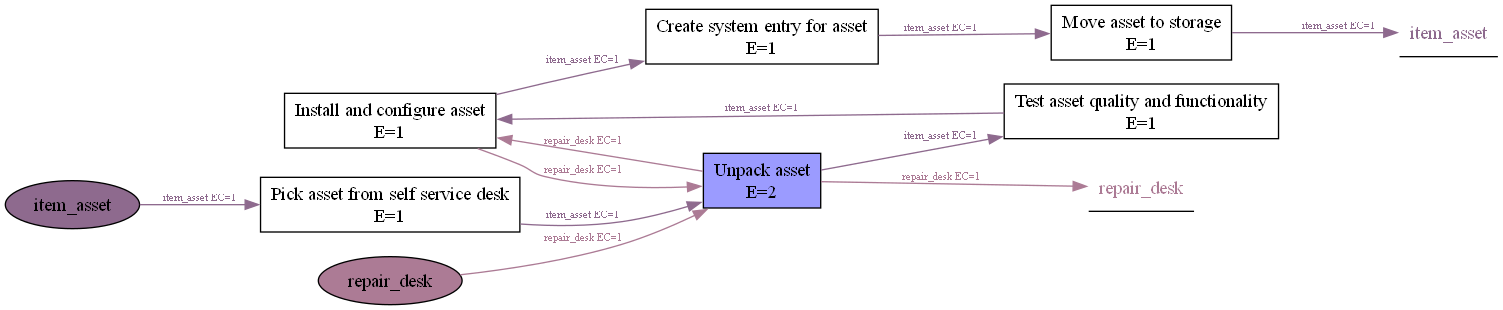

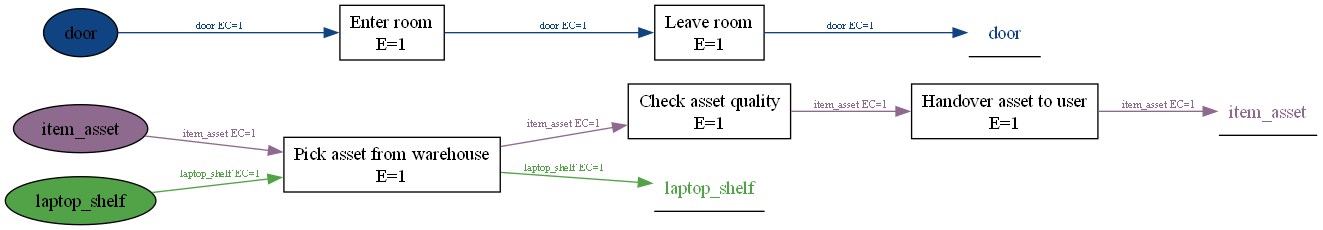

parsing log, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


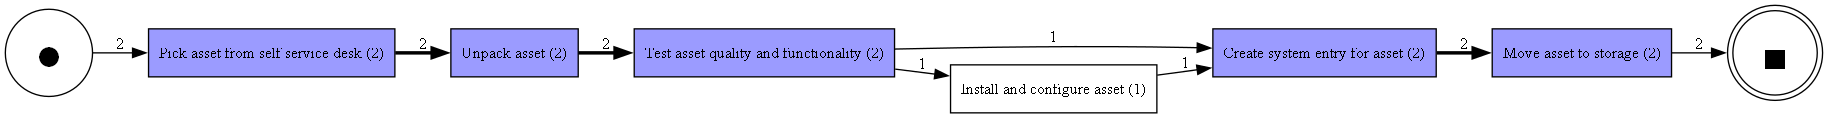

exporting log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


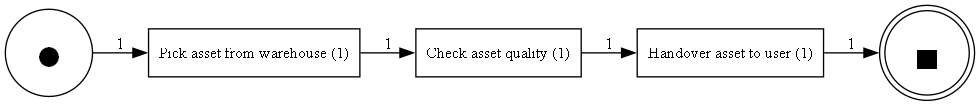

exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
## ID019: New asset inventory
## ID020: New asset inventory
## ID021: Asset disbursement to clients

video07_log_ocel = pm4py.read_ocel_json('../scene07/scene07_video_ocel.json')
print(video07_log_ocel)

# New asset inventory
filtered_ocel07_nai = pm4py.filtering.filter_ocel_objects(video07_log_ocel, object_identifiers=['L5', 'C8'],positive=False,level=2)
ocel07_nai = pm4py.ocel.discover_ocdfg(filtered_ocel07_nai)
pm4py.vis.view_ocdfg(ocel07_nai)  

ocel07_path_nai = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene07_video_ocel_nai'
pm4py.write_ocel_json(filtered_ocel07_nai,ocel07_path_nai)

# Asset disbursement to clients
filtered_ocel07_adtc = pm4py.filtering.filter_ocel_objects(video07_log_ocel, object_identifiers=['K2', 'H3'],positive=False,level=2)
ocel07_adtc = pm4py.ocel.discover_ocdfg(filtered_ocel07_adtc)
pm4py.vis.view_ocdfg(ocel07_adtc)  

ocel07_path_adtc = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene07_video_ocel_adtc'
pm4py.write_ocel_json(filtered_ocel07_adtc,ocel07_path_adtc)



### XES
video07_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene07_video_xes.xes')

# New asset inventory
filtered_xes07_nai = pm4py.filtering.filter_trace_attribute_values(log=video07_log_xes, attribute_key='case:concept:name', values=['L5','C8'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes07_nai, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes07_path_nai = '../dataProcessing/filteredSceneVideoXES/filtered_scene07_video_nai'
pm4py.write_xes(filtered_xes07_nai,xes07_path_nai)

# Asset disbursement to clients
filtered_xes07_adtc = pm4py.filtering.filter_trace_attribute_values(log=video07_log_xes, attribute_key='case:concept:name', values=['K2','H3'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes07_adtc, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes07_path_adtc = '../dataProcessing/filteredSceneVideoXES/filtered_scene07_video_adtc'
pm4py.write_xes(filtered_xes07_adtc, xes07_path_adtc)

Object-Centric Event Log (number of events: 22, number of objects: 13, number of activities: 11, number of object types: 7, events-objects relationships: 65)
Activities occurrences: {'Check asset quality': 5, 'Enter room': 3, 'Leave room': 3, 'Describe quality issue': 2, 'Handover asset to user': 2, 'Move asset to storage': 2, 'Chat': 1, 'Move asset to repair desk': 1, 'Pick asset from warehouse': 1, 'Handover asset to admin': 1, 'Check-In asset to storage': 1}
Object types occurrences (number of objects): {'item_asset': 5, 'admin_user': 3, 'door': 1, 'it_working_desk': 1, 'repair_desk': 1, 'self_service_storage': 1, 'laptop_shelf': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


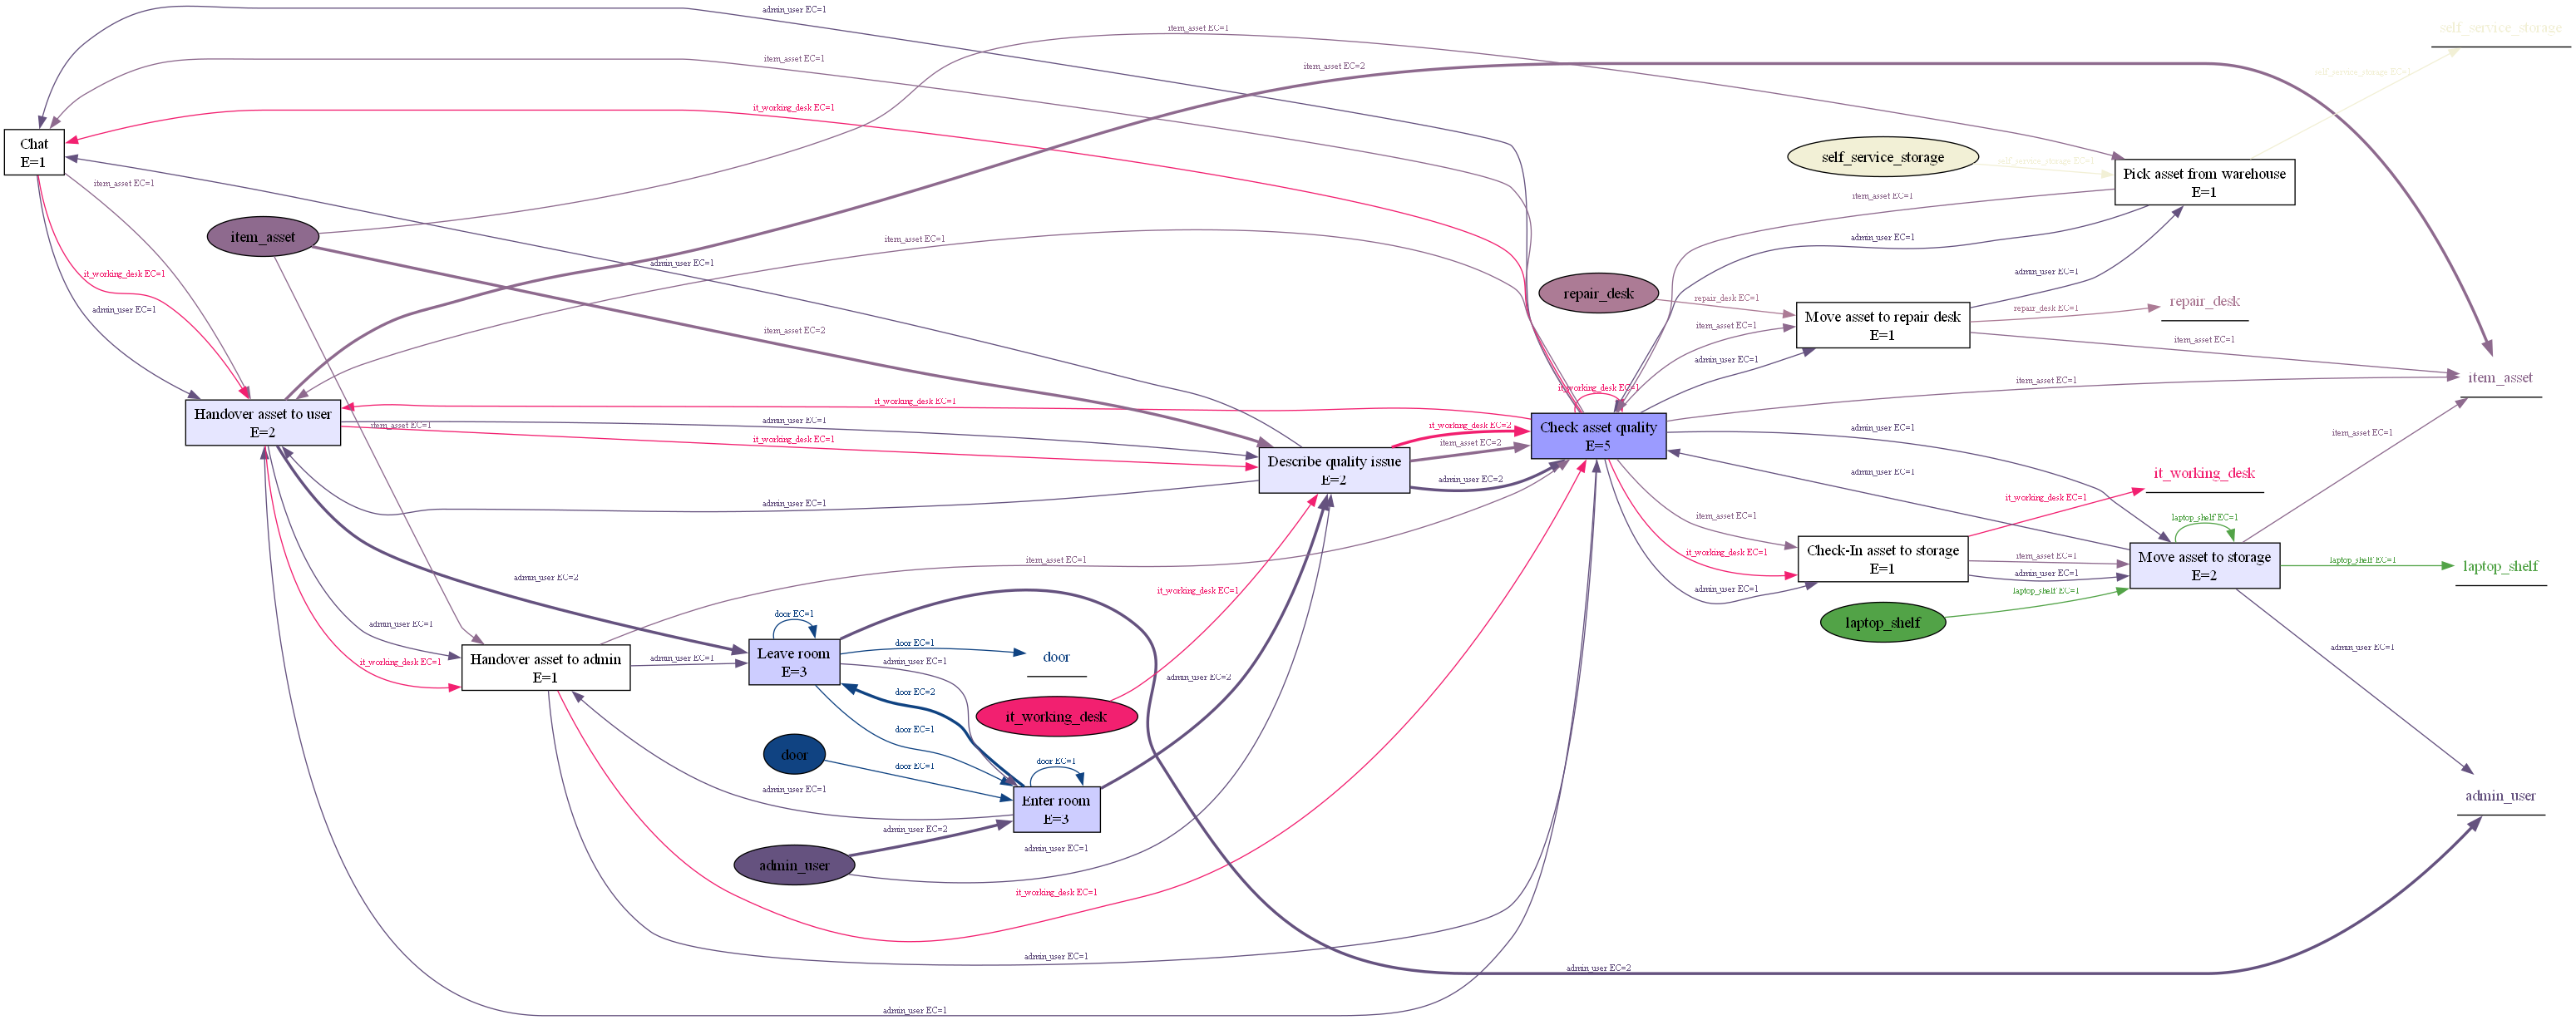

In [8]:
## Exclude this case, cause processes not relevant to Thema 5

video8_log_ocel = pm4py.read_ocel_json('../scene08/scene08_video_ocel.json')
print(video8_log_ocel)

ocel08 = pm4py.ocel.discover_ocdfg(video8_log_ocel)
pm4py.vis.view_ocdfg(ocel08)  

Object-Centric Event Log (number of events: 23, number of objects: 14, number of activities: 7, number of object types: 7, events-objects relationships: 71)
Activities occurrences: {'Pick asset from warehouse': 4, 'Check asset quality': 4, 'Enter room': 3, 'Chat': 3, 'Check-Out asset to user': 3, 'Handover asset to user': 3, 'Leave room': 3}
Object types occurrences (number of objects): {'item_asset': 5, 'admin_user': 4, 'door': 1, 'it_working_desk': 1, 'laptop_shelf': 1, 'mouse_cupboard': 1, 'keyboard_cupboard': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


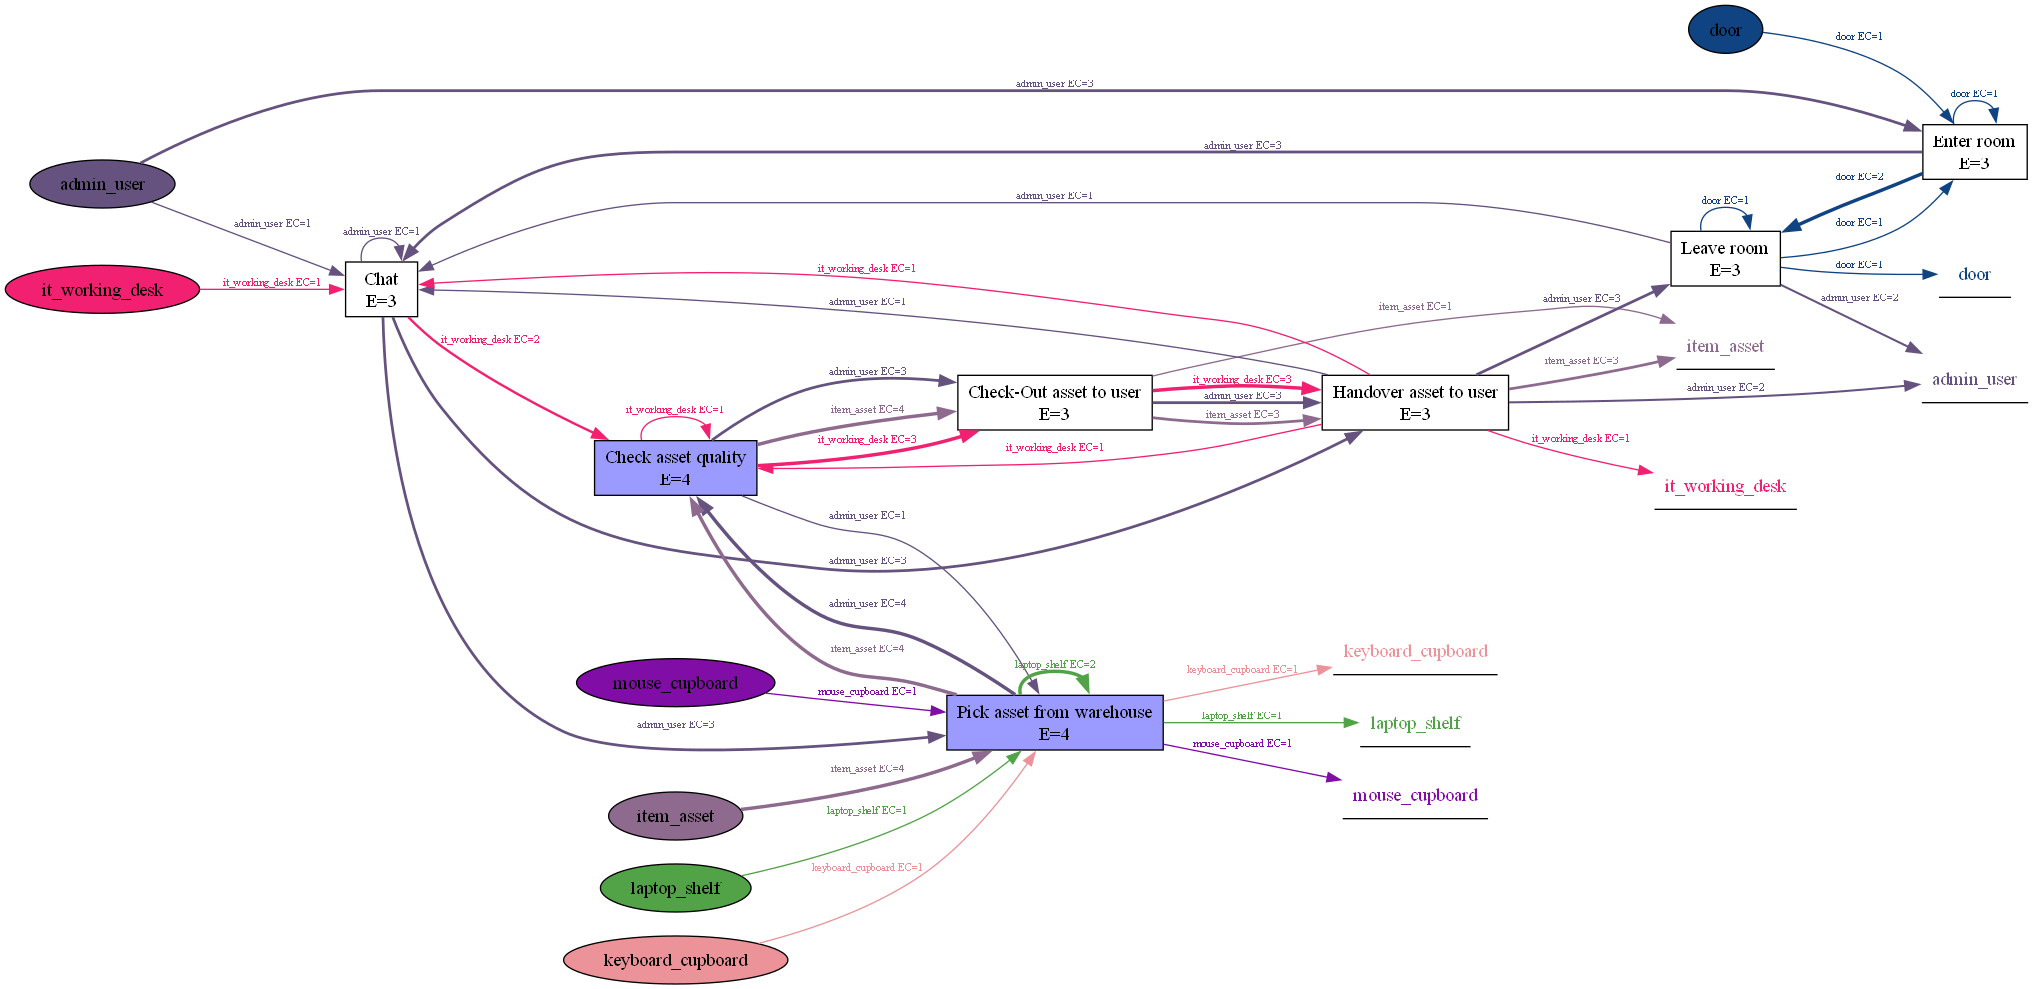

parsing log, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

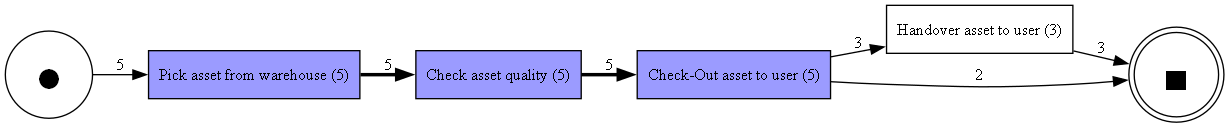

exporting log, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
## ID025: Asset disbursement to clients
## ID026: Asset disbursement to clients
## ID027: Asset disbursement to clients

video09_log_ocel = pm4py.read_ocel_json('../scene09/scene09_video_ocel.json')
print(video09_log_ocel)

ocel09_adtc = pm4py.ocel.discover_ocdfg(video09_log_ocel)
pm4py.vis.view_ocdfg(ocel09_adtc)  

# no filter, write for docu purpose
ocel09_path_adtc = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene09_video_ocel_adtc'
pm4py.write_ocel_json(video09_log_ocel,ocel09_path_adtc)


### XES
video09_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene09_video_xes.xes')
dfg, start_activities, end_activities = pm4py.discover_dfg(video09_log_xes, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes09_path_adtc = '../dataProcessing/filteredSceneVideoXES/filtered_scene09_video_adtc'
pm4py.write_xes(video09_log_xes,xes09_path_adtc)

Object-Centric Event Log (number of events: 21, number of objects: 7, number of activities: 11, number of object types: 5, events-objects relationships: 61)
Activities occurrences: {'Move asset to storage': 3, 'Test asset quality and functionality': 2, 'Unpack asset': 2, 'Pick asset from warehouse': 2, 'Install and configure asset': 2, 'Label asset': 2, 'Create system entry for asset': 2, 'Update asset status in the system': 2, 'Carry out repair': 2, 'Pick asset from self service desk': 1, 'Check asset quality': 1}
Object types occurrences (number of objects): {'item_asset': 3, 'admin_user': 1, 'self_service_storage': 1, 'repair_desk': 1, 'it_working_desk': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


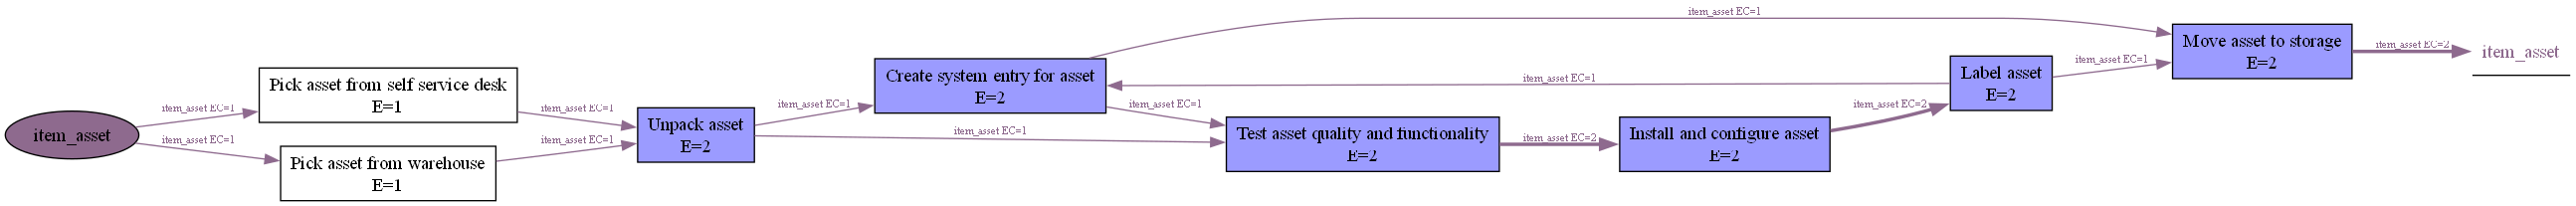

parsing log, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


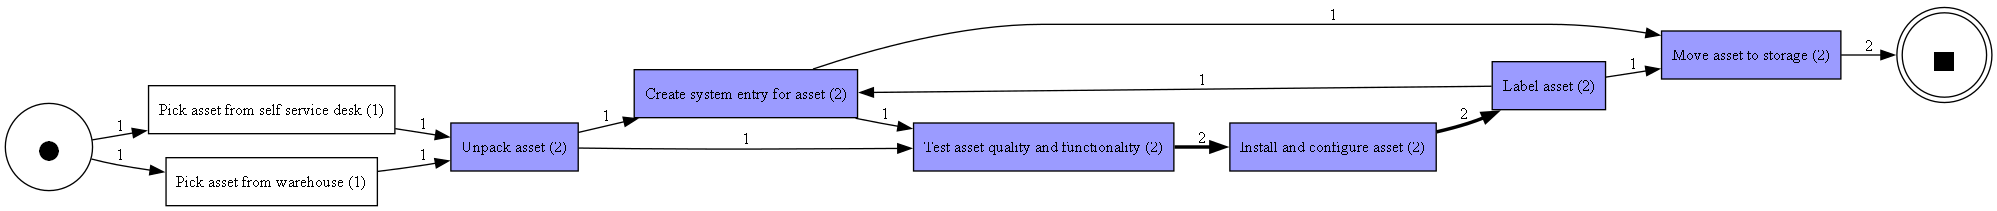

exporting log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
## ID028: New asset inventory
## ID029: New asset inventory

video10_log_ocel = pm4py.read_ocel_json('../scene10/scene10_video_ocel.json')
print(video10_log_ocel)

filtered_ocel10_nai = pm4py.filtering.filter_ocel_objects(video10_log_ocel, object_identifiers=['K1'],positive=False,level=2)
ocel10_nai = pm4py.ocel.discover_ocdfg(filtered_ocel10_nai)
pm4py.vis.view_ocdfg(ocel10_nai)  

ocel10_path_nai = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene10_video_ocel_nai'
pm4py.write_ocel_json(filtered_ocel10_nai,ocel10_path_nai)


### XES

video10_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene10_video_xes.xes')
filtered_xes10_nai = pm4py.filtering.filter_trace_attribute_values(log=video10_log_xes, attribute_key='case:concept:name', values=['K1'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes10_nai, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes10_path_nai = '../dataProcessing/filteredSceneVideoXES/filtered_scene10_video_nai'
pm4py.write_xes(filtered_xes10_nai,xes10_path_nai)

Object-Centric Event Log (number of events: 27, number of objects: 12, number of activities: 14, number of object types: 7, events-objects relationships: 76)
Activities occurrences: {'Chat': 5, 'Check asset quality': 4, 'Leave room': 3, 'Enter room': 3, 'Carry out repair': 2, 'Pick asset from self service desk': 2, 'Pick asset from warehouse': 1, 'Move asset to repair desk': 1, 'Check-In asset for repair': 1, 'Describe quality issue': 1, 'Handover asset to user': 1, 'Check-Out asset to user': 1, 'Update asset status in the system': 1, 'Move asset to storage': 1}
Object types occurrences (number of objects): {'item_asset': 4, 'admin_user': 3, 'door': 1, 'it_working_desk': 1, 'repair_desk': 1, 'laptop_shelf': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


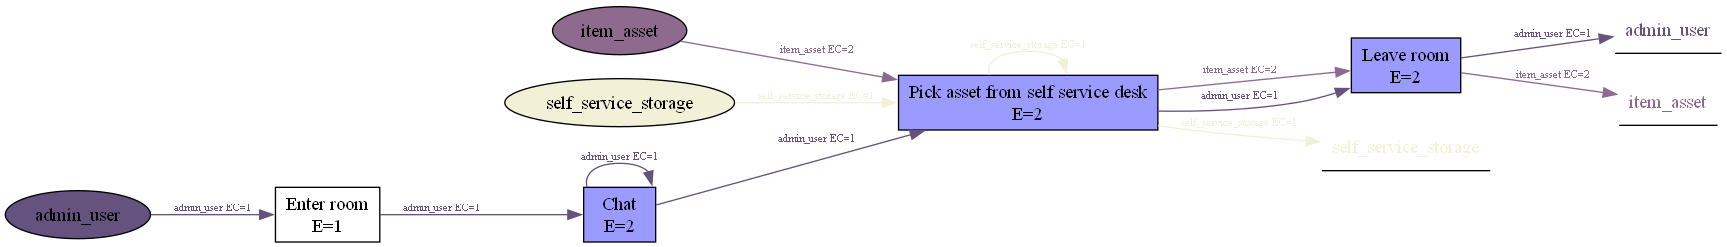

parsing log, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


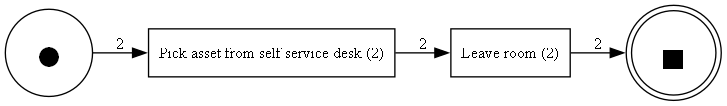

exporting log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
## ID033: Self-service asset check-out
## ID034: Self-service asset check-out

video11_log_ocel = pm4py.read_ocel_json('../scene11/scene11_video_ocel.json')
print(video11_log_ocel)

filtered_ocel11_ssaco = pm4py.filtering.filter_ocel_objects(video11_log_ocel, object_identifiers=['L1', 'L4'],positive=False,level=2)
ocel11_ssaco = pm4py.ocel.discover_ocdfg(filtered_ocel11_ssaco)
pm4py.vis.view_ocdfg(ocel11_ssaco)  

ocel10_path_ssaco = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene11_video_ocel_ssaco'
pm4py.write_ocel_json(filtered_ocel11_ssaco,ocel10_path_ssaco)


### XES
video11_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene11_video_xes.xes')
filtered_xes11_ssaco = pm4py.filtering.filter_trace_attribute_values(log=video11_log_xes, attribute_key='case:concept:name', values=['L1', 'L4'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes11_ssaco, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes11_path_ssaco = '../dataProcessing/filteredSceneVideoXES/filtered_scene11_video_ssaco'
pm4py.write_xes(filtered_xes11_ssaco,xes11_path_ssaco)

Object-Centric Event Log (number of events: 24, number of objects: 13, number of activities: 9, number of object types: 6, events-objects relationships: 72)
Activities occurrences: {'Enter room': 4, 'Check asset quality': 4, 'Leave room': 4, 'Check-Out asset to user': 2, 'Pick asset from warehouse': 2, 'Handover asset to user': 2, 'Handover asset to admin': 2, 'Check-In asset to storage': 2, 'Move asset to storage': 2}
Object types occurrences (number of objects): {'admin_user': 5, 'item_asset': 4, 'door': 1, 'monitor_storage': 1, 'it_working_desk': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


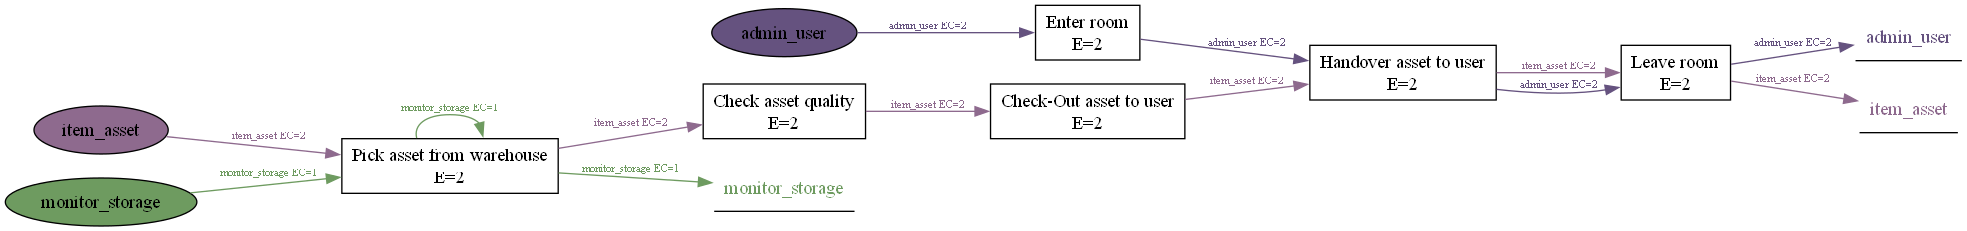

parsing log, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


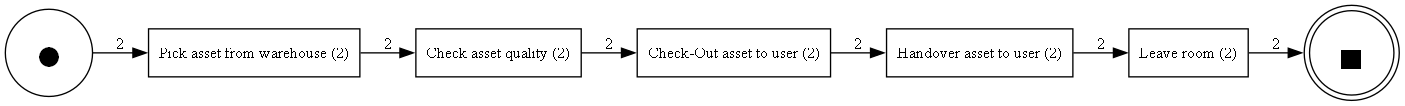

exporting log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

In [12]:
## ID035: Asset disbursement to clients
## ID036: Asset disbursement to clients

video12_log_ocel = pm4py.read_ocel_json('../scene12/scene12_video_ocel.json')
print(video12_log_ocel)

filtered_ocel12_adtc = pm4py.filtering.filter_ocel_objects(video12_log_ocel, object_identifiers=['H5', 'H7'],positive=False,level=2)
ocel12_adtc = pm4py.ocel.discover_ocdfg(filtered_ocel12_adtc)
pm4py.vis.view_ocdfg(ocel12_adtc)  

ocel12_path_adtc = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene12_video_ocel_adtc'
pm4py.write_ocel_json(filtered_ocel12_adtc,ocel12_path_adtc)


### XES
video12_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene12_video_xes.xes')
filtered_xes12_adtc = pm4py.filtering.filter_trace_attribute_values(log=video12_log_xes, attribute_key='case:concept:name', values=['H5', 'H7'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes12_adtc, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes12_path_adtc = '../dataProcessing/filteredSceneVideoXES/filtered_scene12_video_adtc'
pm4py.write_xes(filtered_xes12_adtc,xes12_path_adtc)

Object-Centric Event Log (number of events: 32, number of objects: 18, number of activities: 11, number of object types: 9, events-objects relationships: 98)
Activities occurrences: {'Pick asset from warehouse': 6, 'Check asset quality': 6, 'Enter room': 4, 'Leave room': 4, 'Check-Out asset to user': 4, 'Handover asset to user': 3, 'Chat': 1, 'Move asset to storage': 1, 'Describe quality issue': 1, 'Check-In asset for repair': 1, 'Move asset to repair desk': 1}
Object types occurrences (number of objects): {'item_asset': 7, 'admin_user': 4, 'door': 1, 'laptop_shelf': 1, 'it_working_desk': 1, 'keyboard_cupboard': 1, 'mouse_cupboard': 1, 'monitor_storage': 1, 'repair_desk': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


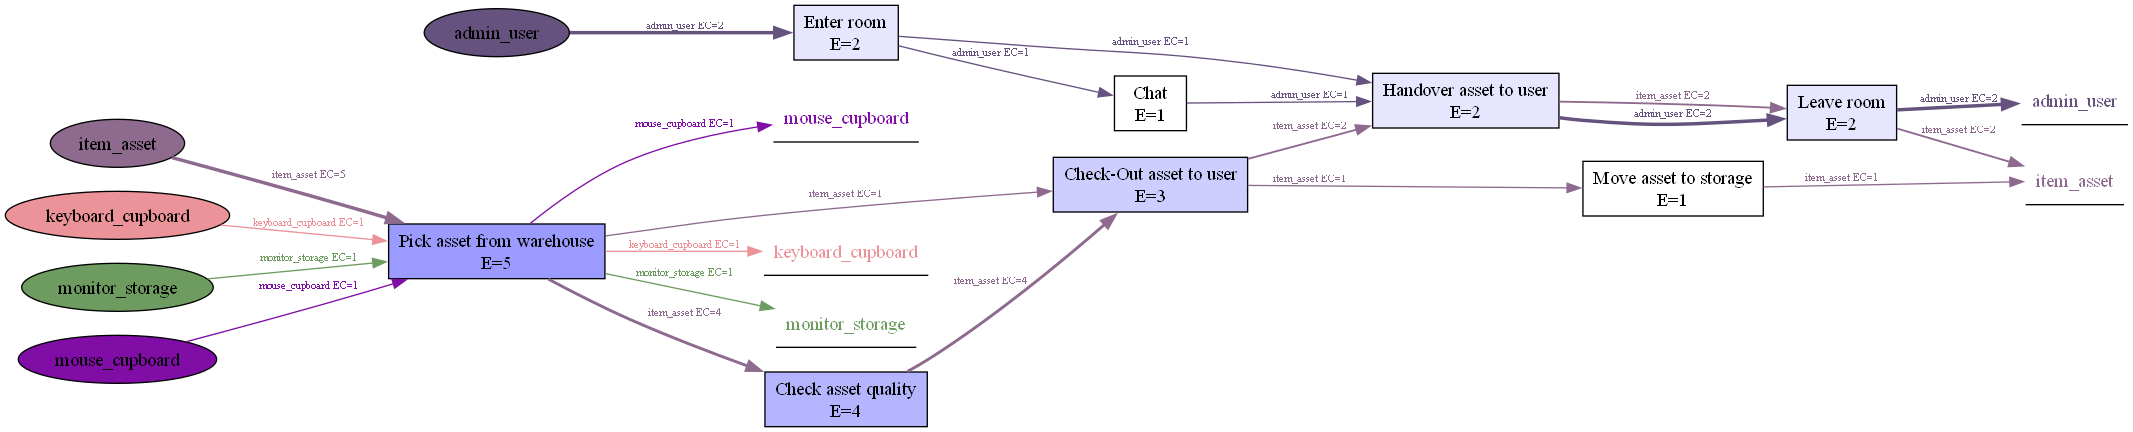

parsing log, completed traces ::   0%|          | 0/7 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


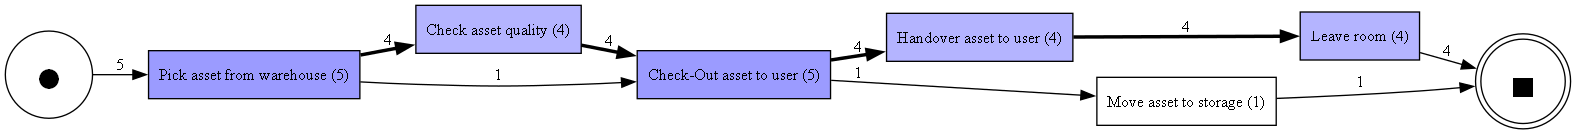

exporting log, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

In [13]:
## ID039: Asset disbursement to clients
## ID040: Asset disbursement to clients

video13_log_ocel = pm4py.read_ocel_json('../scene13/scene13_video_ocel.json')
print(video13_log_ocel)

filtered_ocel13_adtc = pm4py.filtering.filter_ocel_objects(video13_log_ocel, object_identifiers=['L1', 'L3'],positive=False,level=2)
ocel13_adtc = pm4py.ocel.discover_ocdfg(filtered_ocel13_adtc)
pm4py.vis.view_ocdfg(ocel13_adtc)  

ocel13_path_adtc = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene13_video_ocel_adtc'
pm4py.write_ocel_json(filtered_ocel13_adtc,ocel13_path_adtc)


### XES
video13_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene13_video_xes.xes')
filtered_xes13_adtc = pm4py.filtering.filter_trace_attribute_values(log=video13_log_xes, attribute_key='case:concept:name', values=['L1', 'L3'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes13_adtc, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes13_path_adtc = '../dataProcessing/filteredSceneVideoXES/filtered_scene13_video_adtc'
pm4py.write_xes(filtered_xes13_adtc,xes13_path_adtc)

Object-Centric Event Log (number of events: 19, number of objects: 13, number of activities: 14, number of object types: 8, events-objects relationships: 56)
Activities occurrences: {'Enter room': 2, 'Check asset quality': 2, 'Leave room': 2, 'Chat': 2, 'Carry out repair': 2, 'Describe quality issue': 1, 'Pick asset from warehouse': 1, 'Move asset to repair desk': 1, 'Check-In asset for repair': 1, 'Handover asset to user': 1, 'Check-Out asset to user': 1, 'Pick asset from self service desk': 1, 'Update asset status in the system': 1, 'Move asset to storage': 1}
Object types occurrences (number of objects): {'item_asset': 4, 'admin_user': 3, 'door': 1, 'it_working_desk': 1, 'repair_desk': 1, 'mouse_cupboard': 1, 'laptop_shelf': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


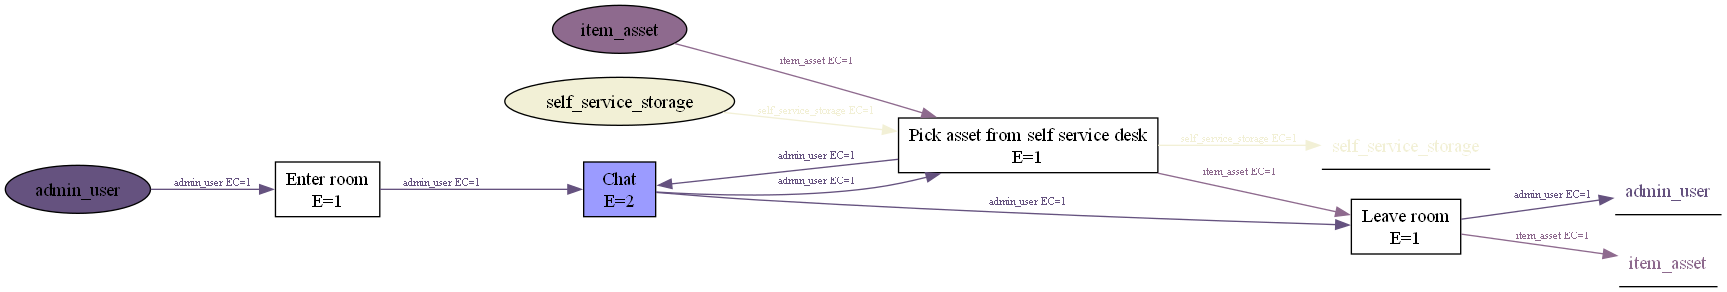

parsing log, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


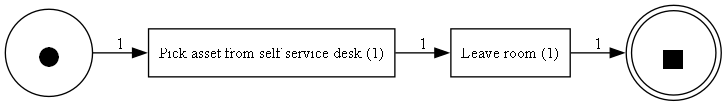

exporting log, completed traces ::   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
## ID044: Self-service asset check-out

video14_log_ocel = pm4py.read_ocel_json('../scene14/scene14_video_ocel.json')
print(video14_log_ocel)

filtered_ocel14_ssaco = pm4py.filtering.filter_ocel_objects(video14_log_ocel, object_identifiers=['P1', 'P9', 'L3'],positive=False,level=2)
ocel14_ssaco = pm4py.ocel.discover_ocdfg(filtered_ocel14_ssaco)
pm4py.vis.view_ocdfg(ocel14_ssaco)  

ocel14_path_ssaco = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene14_video_ocel_ssaco'
pm4py.write_ocel_json(filtered_ocel14_ssaco,ocel14_path_ssaco)


### XES
video14_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene14_video_xes.xes')
filtered_xes14_ssaco = pm4py.filtering.filter_trace_attribute_values(log=video14_log_xes, attribute_key='case:concept:name', values=['P1', 'P9', 'L3'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes14_ssaco, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes14_path_ssaco = '../dataProcessing/filteredSceneVideoXES/filtered_scene14_video_ssaco'
pm4py.write_xes(filtered_xes14_ssaco,xes14_path_ssaco)

Object-Centric Event Log (number of events: 23, number of objects: 16, number of activities: 11, number of object types: 9, events-objects relationships: 71)
Activities occurrences: {'Check asset quality': 5, 'Enter room': 3, 'Pick asset from warehouse': 3, 'Leave room': 3, 'Handover asset to user': 2, 'Move asset to storage': 2, 'Check-Out asset to user': 1, 'Carry out repair': 1, 'Update asset status in the system': 1, 'Handover asset to admin': 1, 'Check-In asset to storage': 1}
Object types occurrences (number of objects): {'item_asset': 5, 'admin_user': 4, 'door': 1, 'monitor_storage': 1, 'it_working_desk': 1, 'repair_desk': 1, 'mouse_cupboard': 1, 'keyboard_cupboard': 1, 'laptop_shelf': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


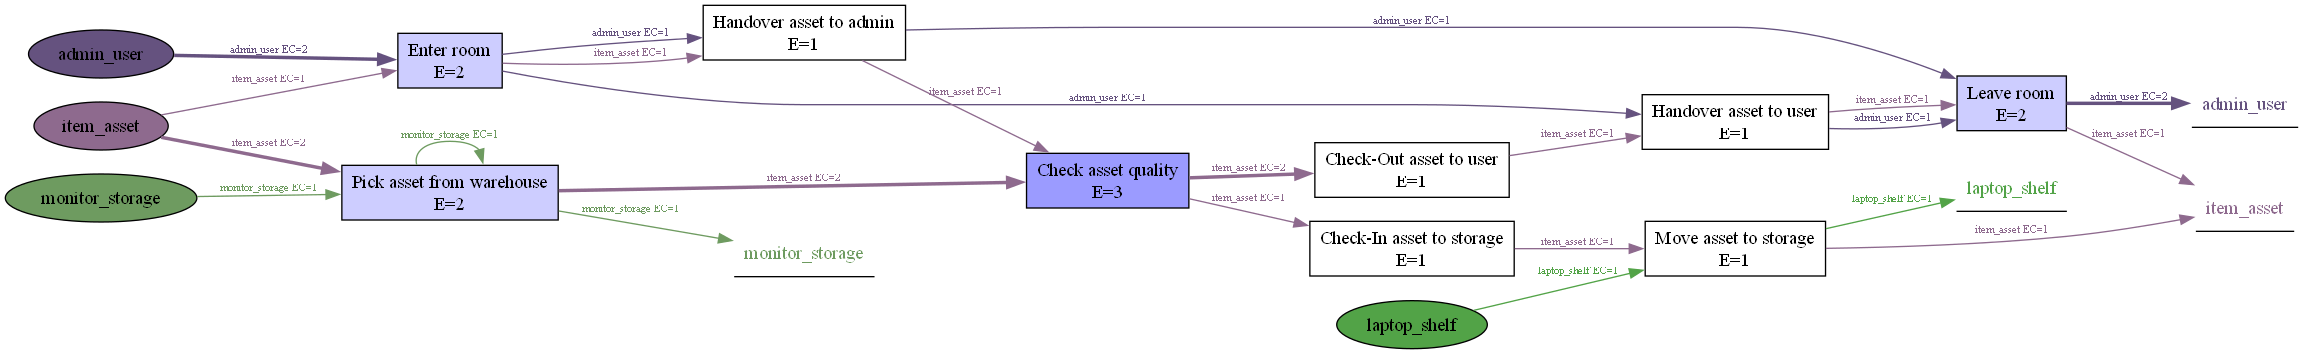

parsing log, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\anhdz\PycharmProjects\processIntelligenceThema5\.venv\Lib\site-packages\pm4py\algo\discovery\dfg\adapters\pandas\df_statistics.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


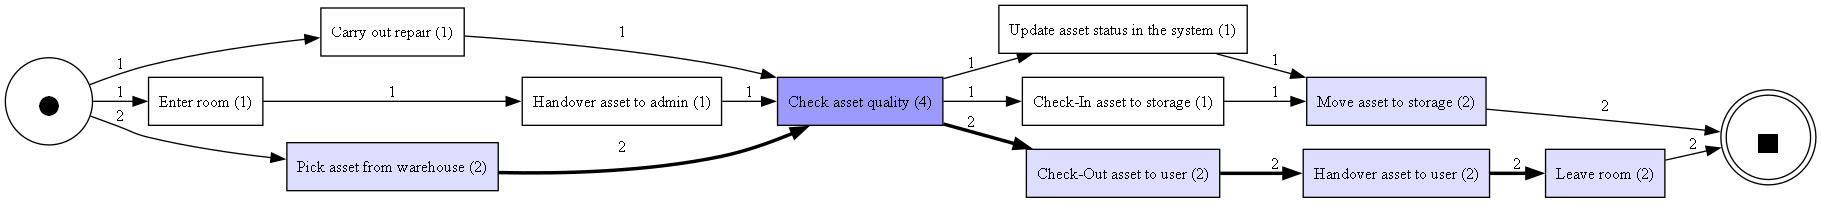

exporting log, completed traces ::   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
## ID045: Asset disbursement to clients
## ID047: Asset disbursement to clients

video15_log_ocel = pm4py.read_ocel_json('../scene15/scene15_video_ocel.json')
print(video15_log_ocel)

filtered_ocel15_adtc = pm4py.filtering.filter_ocel_objects(video15_log_ocel, object_identifiers=['P1', 'T2', 'C2'],positive=False,level=2)
ocel15_adtc = pm4py.ocel.discover_ocdfg(filtered_ocel15_adtc)
pm4py.vis.view_ocdfg(ocel15_adtc)  

ocel15_path_adtc = '../dataProcessing/filteredSceneVideoOCEL/filtered_scene15_video_ocel_adtc'
pm4py.write_ocel_json(filtered_ocel15_adtc,ocel_path) 


### XES
video15_log_xes = pm4py.read_xes('../dataProcessing/sceneVideoXES/scene15_video_xes.xes')
filtered_xes15_adtc = pm4py.filtering.filter_trace_attribute_values(log=video15_log_xes, attribute_key='case:concept:name', values=['P2', 'T2'], retain=False)

dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_xes15_adtc, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

xes15_path_adtc = '../dataProcessing/filteredSceneVideoXES/filtered_scene15_video_adtc'
pm4py.write_xes(filtered_xes15_adtc,xes15_path_adtc)